In [430]:
# モジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [431]:
# データの読み込み
df_test = pd.read_csv('titanic_test.csv')
df_train = pd.read_csv('titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [432]:
# データの特徴量の確認
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [433]:
# 数値に置き換える
mapping_1 = {'male':0,'female':1}
mapping_2 = {'S':0,'C':1,'Q':2}

df_train['Sex'] = df_train['Sex'].map(mapping_1)
df_test['Sex'] = df_test['Sex'].map(mapping_1)
df_train['Embarked'] = df_train['Embarked'].map(mapping_2)
df_test['Embarked'] = df_test['Embarked'].map(mapping_2)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [434]:
# 欠損値の数の確認
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [435]:
# 扱えそうにないデータの削除

df_train1 = df_train.dropna(subset = ['Embarked'])
del df_train1['Cabin']
del df_train1['Name']
del df_train1['Ticket']

df_test1 = df_test.dropna(subset = ['Embarked'])
del df_test1['Cabin']
del df_test1['Name']
del df_test1['Ticket']

df_train1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
5,6,0,3,0,NaN,0,0,8.4583,2.0
6,7,0,1,0,54.0,0,0,51.8625,0.0
7,8,0,3,0,2.0,3,1,21.0750,0.0
8,9,1,3,1,27.0,0,2,11.1333,0.0
9,10,1,2,1,14.0,1,0,30.0708,1.0


In [436]:
# データの名前を短くする
dd = df_train1
dt = df_test1

In [437]:
# 相関係数行列の出力
dd.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.033681,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.082446,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.365902,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.099037,0.116348,0.247508,0.179958,0.118593
Age,0.033681,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.307351,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.187896,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.093143,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


In [438]:
# 欠損値の多いAgeと相関係数の絶対値が相対的に一番高いSibSpのデータを取り出し, 関係を見る
X = dd.iloc[:,[5]]
X = X.values.reshape(-1)
y = dd.ix[:,[4]]
y = y.values.reshape(-1)

/Users/arounderstand/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


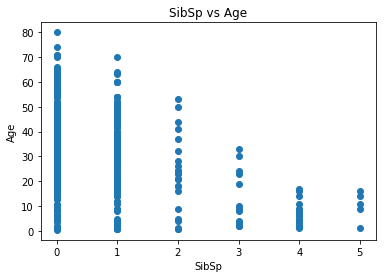

In [439]:
plt.scatter(X, y)                   # 散布図を表示
plt.title('SibSp vs Age')   # タイトルを表示
plt.xlabel('SibSp')              # x軸のラベルを表示
plt.ylabel('Age')              # y軸のラベルを表示
plt.show()                          # 指定した内容でグラフを出力

In [440]:
# 乗客に兄弟などが多いのは確かに子供であると考えられるため平均値補完を行う
aaa = dd[dd['SibSp']>3].fillna(dd['SibSp'].mean())
aaa.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
16,17,0,3,0,2.0,4,1,29.1250,2.0
50,51,0,3,0,7.0,4,1,39.6875,0.0
59,60,0,3,0,11.0,5,2,46.9000,0.0
68,69,1,3,1,17.0,4,2,7.9250,0.0
71,72,0,3,1,16.0,5,2,46.9000,0.0


In [441]:
dd[dd['SibSp'] >= 3].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [442]:
dt[dt['SibSp'] >= 3].index

Int64Index([53, 55, 140, 145, 154, 188, 214, 360, 379, 389, 394], dtype='int64')

In [443]:
bbb = dd.drop( [7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],axis = 0)

In [444]:
ccc = pd.concat([aaa,bbb],axis = 0)
ccc.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
16,17,0,3,0,2.0,4,1,29.1250,2.0
50,51,0,3,0,7.0,4,1,39.6875,0.0
59,60,0,3,0,11.0,5,2,46.9000,0.0
68,69,1,3,1,17.0,4,2,7.9250,0.0
71,72,0,3,1,16.0,5,2,46.9000,0.0


In [445]:
# 確認のため平均値補完を行なったデータ数を見る
ccc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            166
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [446]:
# データを正解ラベルと分割
ccc = ccc.dropna()
sd = ccc.ix[:,[1]]
td = ccc.ix[:,2:9]
td.head()

/Users/arounderstand/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
16,3,0,2.0,4,1,29.1250,2.0
50,3,0,7.0,4,1,39.6875,0.0
59,3,0,11.0,5,2,46.9000,0.0
68,3,1,17.0,4,2,7.9250,0.0
71,3,1,16.0,5,2,46.9000,0.0


In [447]:
# Arrayの形式にする
y_1 = sd.values
X_1 = td.values
X_1

array([[ 3.    ,  0.    ,  2.    , ...,  1.    , 29.125 ,  2.    ],
       [ 3.    ,  0.    ,  7.    , ...,  1.    , 39.6875,  0.    ],
       [ 3.    ,  0.    , 11.    , ...,  2.    , 46.9   ,  0.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ...,  0.    , 30.    ,  0.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [448]:
# 決定木による学習を行う;勾配ブースティング木を用いる
# データの標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_1)                   
X_std = ss.fit_transform(X_1)

In [449]:
# 適切な係数を手動で求めるためにデータを分割:ホールドアウト法である
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y_1,random_state = 0,test_size = 0.3)

In [450]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth = 2, learning_rate=0.35)
gbct.fit(X_train, y_train)

/Users/arounderstand/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.35, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [451]:
print('train accuracy: %.3f' % gbct.score(X_train, y_train))
print('test  accuracy: %.3f' % gbct.score(X_test, y_test))

train accuracy: 0.929
test  accuracy: 0.845


In [452]:
# 全trainデータの学習
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth = 2, learning_rate=0.35)
gbct.fit(X_std, y_1)

/Users/arounderstand/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.35, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [453]:
data = dt.fillna(dt.mean())
del data['PassengerId']
data = data.values

In [454]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)                   
data_std = ss.fit_transform(data)

In [455]:
# 予測ラベル
gbct.predict(data_std)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,